In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
df = pd.read_excel('./datasets/Dataset_Yakutia.xlsx')
products = pd.read_excel('./datasets/Products.xlsx')

,Продукт,Описание,Unnamed: 2,Unnamed: 3,Канал,Описание.1
0,ПК,Классический потребительский кредит,NaN,NaN,TMO,Колл центр (телемеркетинг)
1,TOPUP,Рефинансирование внутреннего ПК в Газпромбанке,NaN,NaN,SMS,СМС
2,REFIN,Рефинансирование внешнего ПК в другом банке,NaN,NaN,PUSH,Пуш в мобильном банке
3,CC,Кредитная карта,NaN,NaN,EMAIL,Емэйл
4,AUTO,Классический автокредит,NaN,NaN,MOB_BANNER,Текст для баннера в мобильном приложении
5,AUTO_SCR,Кредит под залог авто,NaN,NaN,OFFICE_BANNER,Текст для баннера для менеджера в доп офисе
6,MORTG,"Ипотека (обычная, льготная, ИТ, дальневосточна...",NaN,NaN,MOBILE_CHAT,Предложение в чате мобильном банке
7,MORTG_REFIN,Рефинансирование ипотеки,NaN,NaN,KND,Продажный текст для курьера на дом
8,MORTG_SCR,Кредит под залог недвижимости,NaN,NaN,NaN,NaN
9,DEPOSIT,Депозит,NaN,NaN,NaN,NaN


In [44]:
df.describe(include = 'object')

,reg_region_nm,app_position_type_nm,visit_purposes,super_clust
count,973,576,150,1000
unique,80,20,14,11
top,Город Москва,,DCARD,"h. Бывшие зарплатники (4,9,10,11)"
freq,82,494,44,263


In [151]:
df.visit_purposes.value_counts()

DCARD         44
DEPOSIT       43
TRANS         13
CCARD         13
POTREB        12
OTHER          7
CREDIT         6
INVEST         3
PAY            3
MVNO           2
SDB            1
EXTRACT        1
ORDER          1
DEPOSCLOSE     1
Name: visit_purposes, dtype: int64

что нужно спросить по датасету
- будут ли на пилоте даваться все те фичи, которые есть в обучающем датасете?
- как определяется попал ли текст в нужный оффер?

какая-то ебнутая статья про NBO и RL https://blog.griddynamics.com/building-a-next-best-action-model-using-reinforcement-learning/

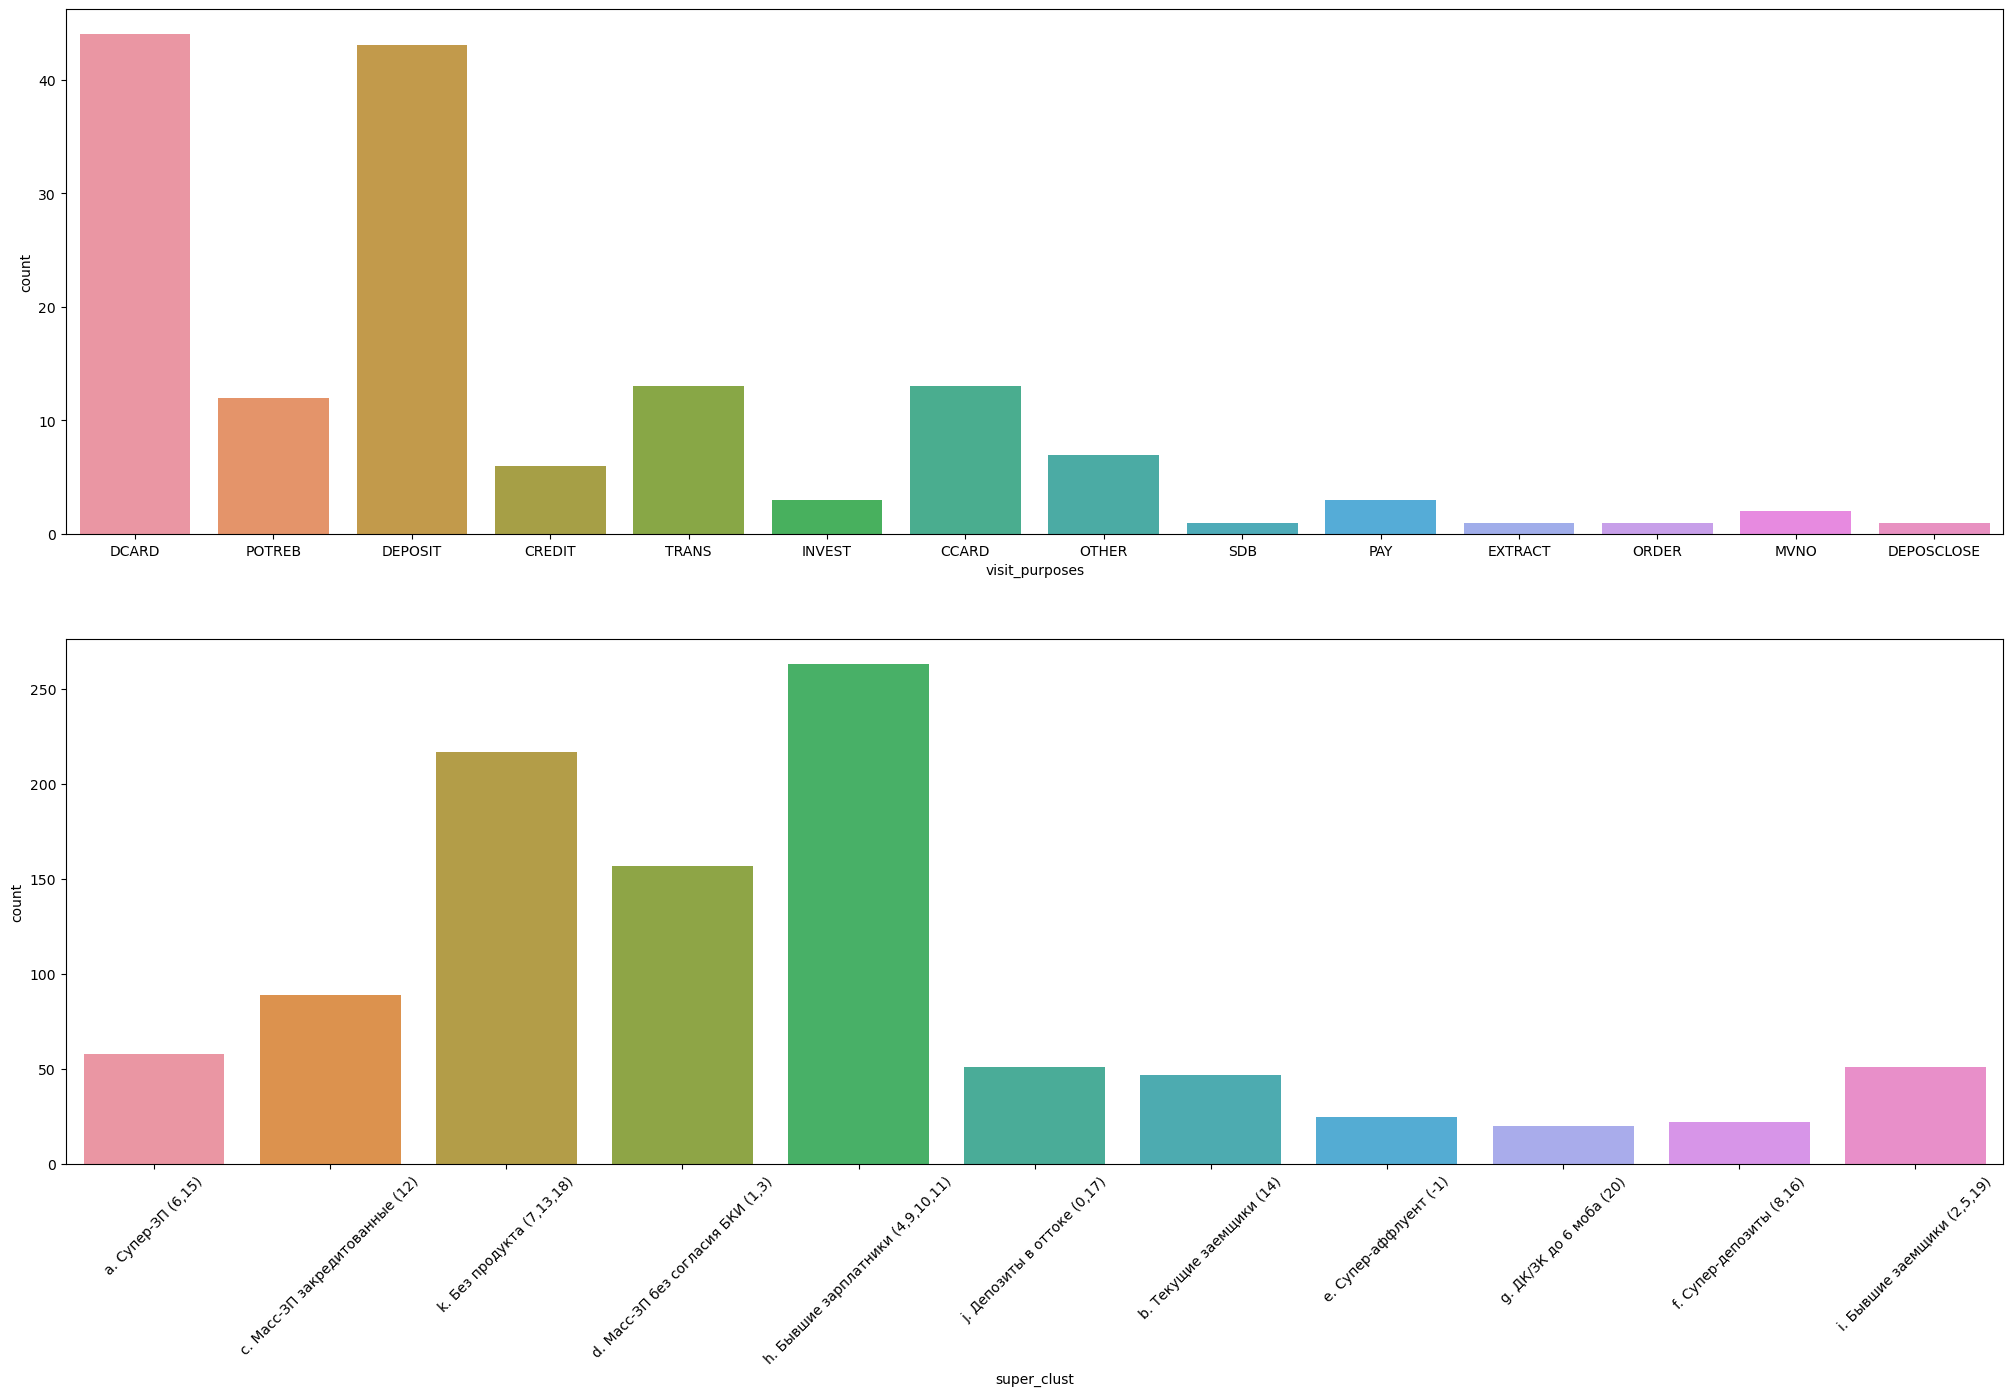

In [80]:
figure, axis = plt.subplots(2,1, figsize = (25,15))
sns.countplot(ax = axis[0],data = df, x = 'visit_purposes')
sns.countplot(ax = axis[1],data = df, x = 'super_clust').set_xticklabels(axis[1].get_xticklabels(),rotation=45);

In [93]:
df.super_clust.value_counts()

h. Бывшие зарплатники (4,9,10,11)    263
k. Без продукта (7,13,18)            217
d. Масс-ЗП без согласия БКИ (1,3)    157
c. Масс-ЗП закредитованные (12)       89
a. Супер-ЗП (6,15)                    58
j. Депозиты в оттоке (0,17)           51
i. Бывшие заемщики (2,5,19)           51
b. Текущие заемщики (14)              47
e. Супер-аффлуент (-1)                25
f. Супер-депозиты (8,16)              22
g. ДК/ЗК до 6 моба (20)               20
Name: super_clust, dtype: int64

In [98]:
df[df.super_clust  == 'a. Супер-ЗП (6,15)'].sum_zp_12m.mean()/12,df[df.super_clust  == 'a. Супер-ЗП (6,15)'].sum_zp_12m.std()/12

(79059.96820175438, 69846.06450099182)

<Axes: xlabel='sum_zp_12m', ylabel='reg_region_nm'>

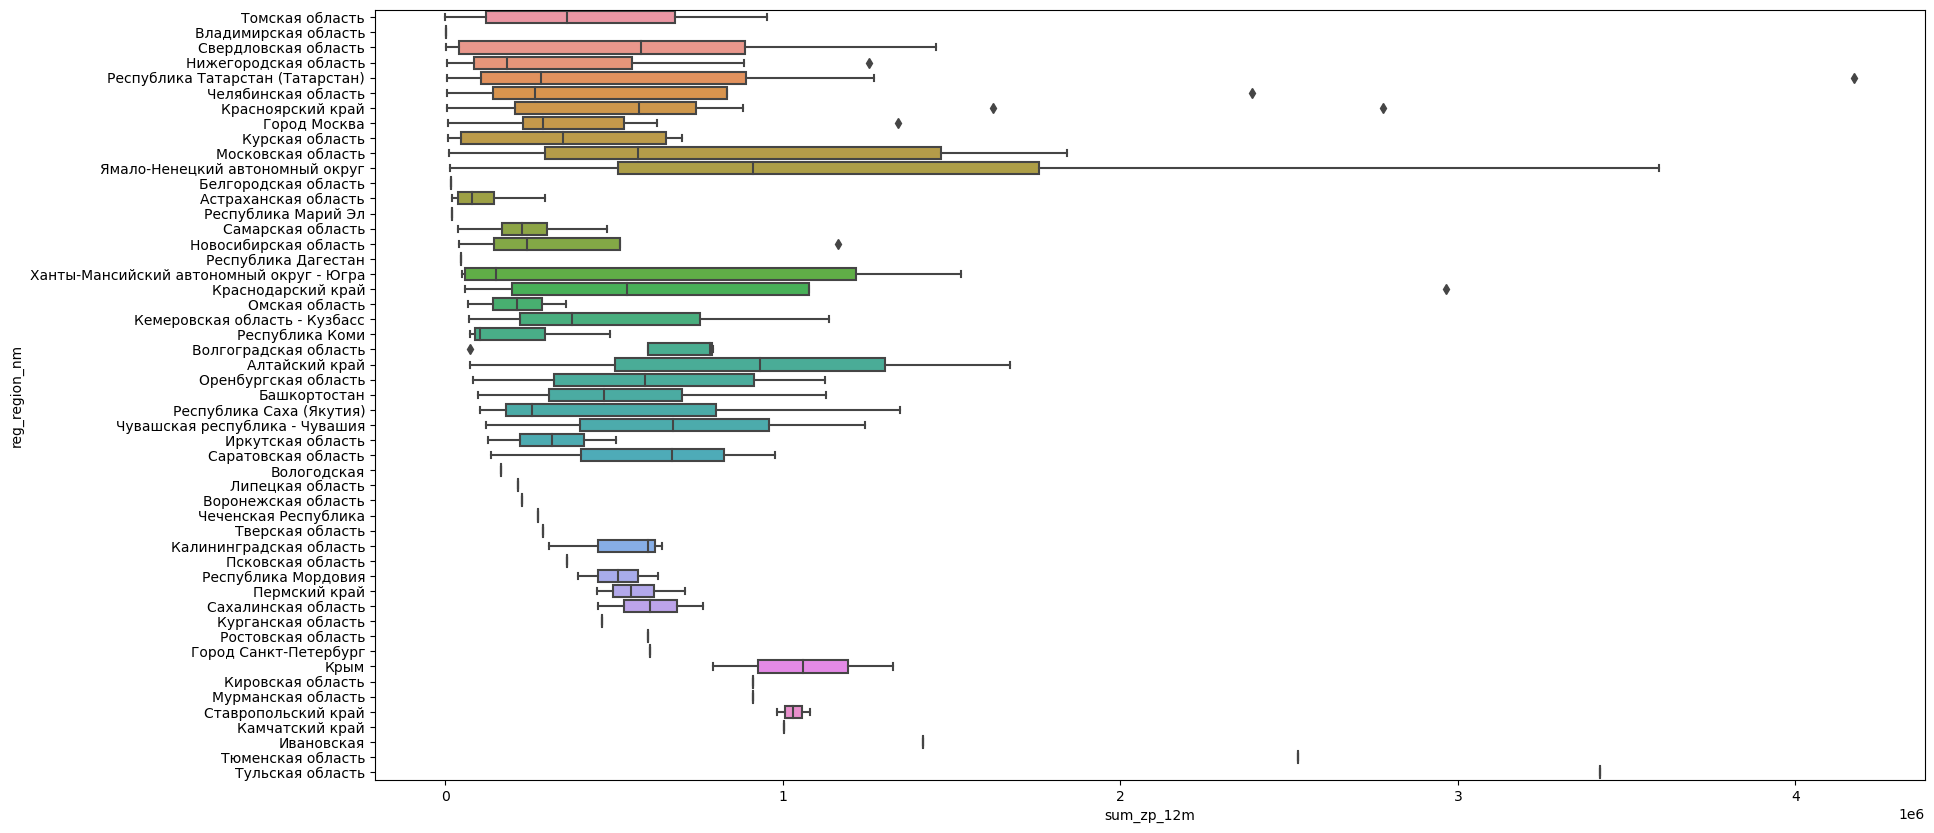

In [145]:
figure, axis = plt.subplots(figsize = (20,10))
sns.boxplot(data = df[df.sum_zp_12m > 0].sort_values('sum_zp_12m'), x = 'sum_zp_12m', y = 'reg_region_nm')

Фичи, которые можно саггрегировать из таблицы:
- можно посчитать среднюю зп и сравнить её с средней в регионе и разбить условно на низкую, высокую, среднюю, далее подавать в промпте для ЛМ
- как часто пользователь тратиться в банке


In [6]:
df.app_position_type_nm.value_counts()

                                            494
17                                           19
не руководящий сотрудник                     19
18                                            8
15                                            6
4                                             5
2                                             3
руководитель (зам. рук-ля) подразделения      3
1                                             3
8                                             2
5                                             2
6                                             2
16                                            2
7                                             2
3                                             1
руководитель (зам. рук-ля) организации        1
9                                             1
Иное                                          1
Военнослужащий                                1
иное                                          1
Name: app_position_type_nm, dtype: int64